In [1]:
import pickle as pkl



In [41]:
eval_units = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/eval_units/en/kmeans_data.pkl"
training_units = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/training_units/hi/kmeans_data.pkl"

In [42]:
with open(eval_units, "rb") as f:
    eval_data = pkl.load(f)

with open(training_units, "rb") as f:
    training_data = pkl.load(f)



In [43]:
len(eval_data["sequences"])
from collections import Counter
Counter(eval_data["all_accents"])

Counter({'nigerian': 1350,
         'italian': 1235,
         'vietnamese': 1113,
         'irish': 1015,
         'uk': 987,
         'spanish': 768,
         'pakistani': 736,
         'kenyan': 723,
         'scottish': 608,
         'indian': 585,
         'jamaican': 584,
         'egyptian': 574,
         'catalan': 573,
         'romanian': 538,
         'lithuanian': 500,
         'chinese': 479,
         'indonesian': 373,
         'polish': 308,
         'bulgarian': 307,
         'south african': 292,
         'ghanian': 235,
         'israeli': 212,
         'french': 202,
         'us': 177,
         'colombian': 150,
         'chilean': 141,
         'macedonian': 133,
         'icelandic': 130,
         'russian': 128,
         'sinhalese': 105,
         'filipino': 98,
         'brazilian': 97,
         'japanese': 86,
         'montenegrin': 79,
         'mexican': 70,
         'ecuadorian': 69,
         'shona': 59,
         'korean': 59,
         'dutch': 58,
       

In [44]:
eval_data["sequences"][0]

array([593, 659, 182, 182, 659, 664, 664, 664, 280, 280, 280, 664, 182,
       182, 659, 280, 390, 280, 280, 280, 280, 280, 280, 527, 358,  36,
       568, 144, 729, 749, 924, 858, 750, 805,  45, 463,  81, 845, 827,
       827,  75,  75, 659, 182, 659, 664, 659, 390, 664, 579, 442, 828,
       828, 608, 300, 608,   2,   4, 799])

In [45]:
len(eval_data["sequences"])

16038

In [46]:
training_units_used = Counter()
for seq in training_data["sequences"]:
    training_units_used.update(Counter(seq))

eval_units_used = Counter()
for seq in eval_data["sequences"]:
    eval_units_used.update(Counter(seq))

(0.0, 0.01)

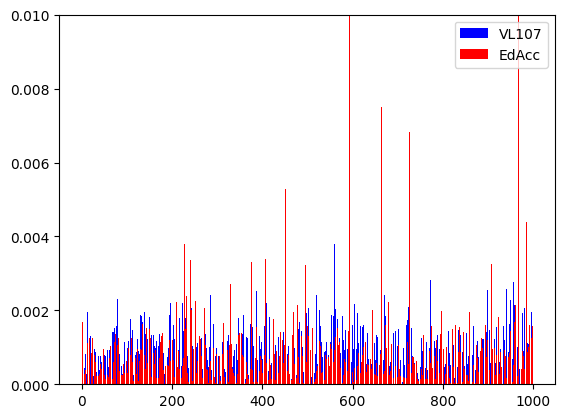

In [56]:
# Plot the distribution of training units
import matplotlib.pyplot as plt
total_units = sum(training_units_used.values())
for k in training_units_used:
    training_units_used[k] /= total_units

total_units = sum(eval_units_used.values())

for k in eval_units_used:
    eval_units_used[k] /= total_units

plt.bar(training_units_used.keys(), training_units_used.values(), color='b', label='VL107')
plt.bar(eval_units_used.keys(), eval_units_used.values(), color='r', label='EdAcc')
plt.legend(loc='upper right')
plt.ylim(0, 0.01)  # Set the maximum y-axis value to 1

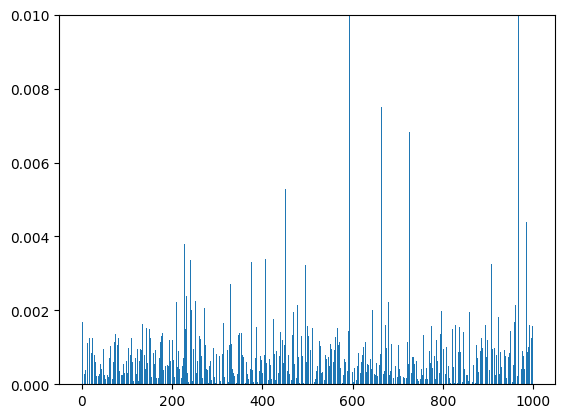

In [37]:
# Plot the distribution of eval units

total_units = sum(eval_units_used.values())

for k in eval_units_used:
    eval_units_used[k] /= total_units
plt.bar(eval_units_used.keys(), eval_units_used.values())
plt.ylim(0, 0.01)  # Set the maximum y-axis value to 1
plt.show()

In [22]:
sum(eval_units_used.values())

946242

In [23]:
sum(training_units_used.values())

1262659

In [24]:
16038*59

946242

In [48]:
#%%
import pickle as pkl
from collections import defaultdict
import pandas as pd

# %%

predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"


with open(predictions_path, "rb") as f:
    eval_data = pkl.load(f)

results_by_accent = defaultdict(lambda: defaultdict(int))
for prediction, accent, label in zip(eval_data["preds"], eval_data["accents"], eval_data["labels"]):
    if prediction == label:
        results_by_accent[accent]["correct"] += 1
    results_by_accent[accent]["total"] += 1
# %%
for accent, results in results_by_accent.items():
    results_by_accent[accent]["accuracy"] = round(results["correct"]/results["total"], 1)
    print(f"Accuracy for {accent}: {results['correct']/results['total']}")



Accuracy for scottish: 0.01644736842105263
Accuracy for sinhalese: 0.0
Accuracy for lithuanian: 0.034
Accuracy for bulgarian: 0.035830618892508145
Accuracy for chinese: 0.020876826722338204
Accuracy for shona: 0.01694915254237288
Accuracy for catalan: 0.006980802792321117
Accuracy for spanish: 0.009114583333333334
Accuracy for romanian: 0.0037174721189591076
Accuracy for indian: 0.006837606837606838
Accuracy for colombian: 0.06666666666666667
Accuracy for nigerian: 0.002962962962962963
Accuracy for french: 0.009900990099009901
Accuracy for mexican: 0.02857142857142857
Accuracy for pakistani: 0.010869565217391304
Accuracy for kenyan: 0.005532503457814661
Accuracy for ghanian: 0.01276595744680851
Accuracy for filipino: 0.05102040816326531
Accuracy for tagalog: 0.08163265306122448
Accuracy for irish: 0.04532019704433497
Accuracy for jamaican: 0.011986301369863013
Accuracy for italian: 0.009716599190283401
Accuracy for israeli: 0.0
Accuracy for vietnamese: 0.011680143755615454
Accuracy for

In [50]:
# Confusion matrix
confusion_matrix = defaultdict(lambda: defaultdict(int))
for prediction, accent in zip(eval_data["preds"], eval_data["accents"]):
    confusion_matrix[accent][prediction] += 1

confusion_matrix_df = pd.DataFrame(confusion_matrix)

# Pretty print
print(confusion_matrix_df.to_string())


     scottish  sinhalese  lithuanian  bulgarian  chinese  shona  catalan  spanish  romanian  indian  colombian  nigerian  french  mexican  pakistani  kenyan  ghanian  filipino  tagalog  irish  jamaican  italian  israeli  vietnamese    us  indonesian    uk  polish  dutch  american  japanese  icelandic  russian  korean  ecuadorian  montenegrin  egyptian  south african  macedonian  chilean  brazilian
fo        3.0        1.0        17.0        5.0     11.0    5.0      2.0      8.0       2.0     6.0        NaN      13.0     3.0      4.0        5.0     9.0      2.0       NaN      NaN   13.0       6.0     11.0      2.0        10.0   2.0         1.0  21.0     9.0    3.0       1.0       1.0        7.0      6.0     2.0         1.0          2.0       6.0            2.0         3.0      1.0        2.0
el       11.0        NaN         3.0        NaN      2.0    NaN     10.0     15.0      10.0     9.0        5.0      15.0     3.0      1.0        7.0    15.0      3.0       NaN      NaN    9.0       

In [51]:
len(eval_data["preds"])

16038

In [54]:
sum(confusion_matrix["lithuanian"].values())

500